In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6

In [2]:
import os

In [3]:
os.chdir("E:\Data Science\R\PROJECTS\PROJECT 3\DataSet\Data Set\Sample - Superstore.xls")

In [4]:
import warnings
import itertools # for creating iteration for effectice looping

In [5]:
warnings.filterwarnings("ignore")

In [6]:
plt.style.use("fivethirtyeight")

In [39]:
plt.rcParams['axes.labelsize']=14
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
plt.rcParams['text.color']='k'

In [7]:
# import dataset file:
storedata = pd.read_excel("Superstore.xls")

In [41]:
storedata.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [42]:
storedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
Row ID           9994 non-null int64
Order ID         9994 non-null object
Order Date       9994 non-null datetime64[ns]
Ship Date        9994 non-null datetime64[ns]
Ship Mode        9994 non-null object
Customer ID      9994 non-null object
Customer Name    9994 non-null object
Segment          9994 non-null object
Country          9994 non-null object
City             9994 non-null object
State            9994 non-null object
Postal Code      9994 non-null int64
Region           9994 non-null object
Product ID       9994 non-null object
Category         9994 non-null object
Sub-Category     9994 non-null object
Product Name     9994 non-null object
Sales            9994 non-null float64
Quantity         9994 non-null int64
Discount         9994 non-null float64
Profit           9994 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(3), object(13)
memory usage: 1.6+ 

In [8]:
furniture = storedata.loc[storedata["Category"]=='Furniture']

In [9]:
furniture['Order Date'].min(), furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [10]:
cols = ['Row ID','Order ID','Ship Date','Ship Mode','Customer ID','Customer Name','Segment','Country','City','State','Postal Code',
       'Region','Product ID','Category','Sub-Category','Product Name','Quantity','Discount','Profit']

In [11]:
furniture.drop(cols, axis=1, inplace=True)

In [11]:
furniture.head()

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
3,2015-10-11,957.5775
5,2014-06-09,48.8600
10,2014-06-09,1706.1840


In [12]:
furniture.columns=['Month','Sales']

In [13]:
furniture.head()

,Month,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
3,2015-10-11,957.5775
5,2014-06-09,48.8600
10,2014-06-09,1706.1840


In [18]:
furniture.tail()

,Month,Sales
9962,2015-03-19,383.4656
9964,2016-12-05,13.4000
9980,2015-09-06,85.9800
9989,2014-01-21,25.2480
9990,2017-02-26,91.9600


In [14]:
furniture['Month']=pd.to_datetime(furniture['Month'])

In [51]:
furniture.head(n=10)

,Month,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
3,2015-10-11,957.5775
5,2014-06-09,48.8600
10,2014-06-09,1706.1840
23,2017-07-16,71.3720
24,2015-09-25,1044.6300
27,2015-09-17,3083.4300
29,2015-09-17,124.2000
36,2016-12-08,190.9200


In [15]:
furniture.set_index('Month',inplace=True)

In [25]:
furniture.head()

,Sales
Month,
2016-11-08,261.9600
2016-11-08,731.9400
2015-10-11,957.5775
2014-06-09,48.8600
2014-06-09,1706.1840


In [16]:
furniture = furniture.sort_values('Month')

In [27]:
furniture.head()

,Sales
Month,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,545.940


In [17]:
furniture.to_csv(r'E:/Data Science/R/PROJECTS/PROJECT 3/DataSet/Data Set/R/furniture.csv',index=True)

In [54]:
y = furniture['Sales'].resample('MS').mean()

In [55]:
type(y)

pandas.core.series.Series

In [57]:
y['2015':'2016']

Month
2015-01-01    782.662773
2015-02-01    284.943091
2015-03-01    446.420821
2015-04-01    317.445409
2015-05-01    312.498350
2015-06-01    296.699192
2015-07-01    341.860500
2015-08-01    301.206006
2015-09-01    437.883717
2015-10-01    334.072875
2015-11-01    401.049773
2015-12-01    360.715925
2016-01-01    346.488318
2016-02-01    206.607947
2016-03-01    312.221756
2016-04-01    377.488286
2016-05-01    351.624070
2016-06-01    343.962421
2016-07-01    335.090231
2016-08-01    430.456286
2016-09-01    328.468445
2016-10-01    247.345354
2016-11-01    392.390479
2016-12-01    436.651369
Freq: MS, Name: Sales, dtype: float64

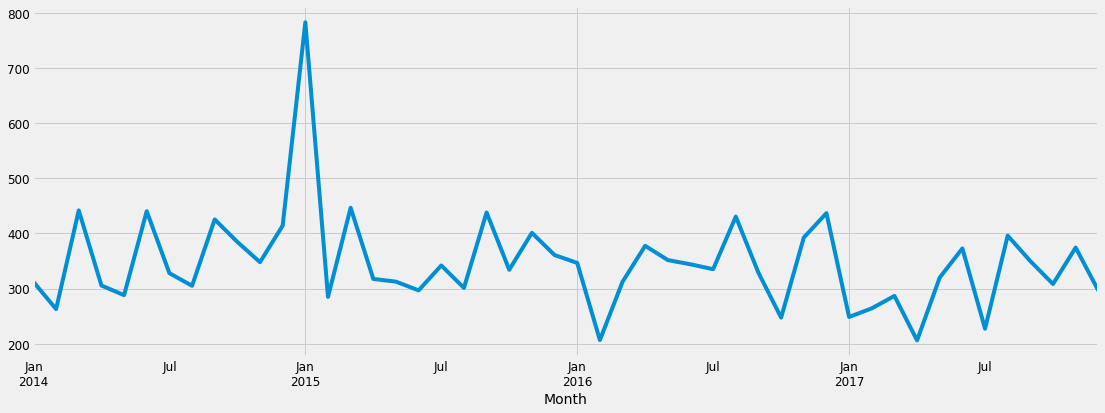

In [60]:
y.plot(figsize=(17,6))
plt.show()

In [61]:
from pylab import rcParams 

In [62]:
rcParams['figure.figsize']=18,8

In [ ]:
# Time series model has Seasonality

In [ ]:
# Decomposition > Trend, Seasonality, and Noise

In [63]:
import statsmodels.api as sm

In [64]:
decomposition = sm.tsa.seasonal_decompose(y, model='additive')

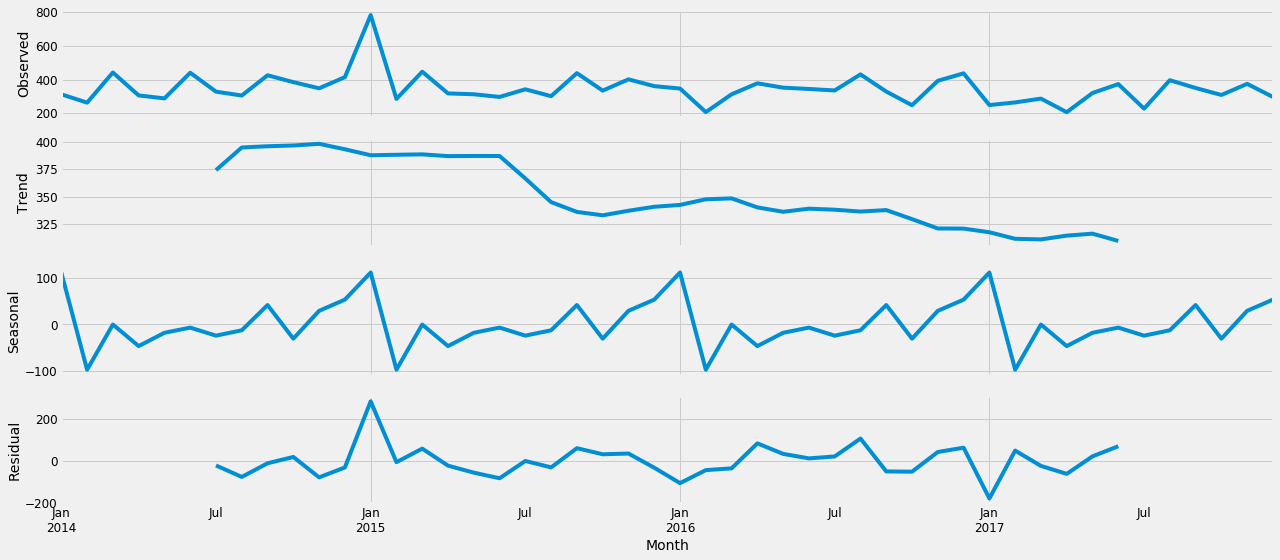

In [65]:
fig = decomposition.plot()
plt.show()

In [ ]:
# Time Series forecasting with ARIMA model
# ARIMA = Auto-regressive Integrated Moving Average
# ARIMA (p,d,q)
# These 3 parameters denotes seasonality, Trend and Noise in the data

In [66]:
p=d=q=range(0,2)

In [67]:
for i in p:
    print(i)

0
1


In [68]:
for i in itertools.product(p,d,q):
    print(i)

(0, 0, 0)
(0, 0, 1)
(0, 1, 0)
(0, 1, 1)
(1, 0, 0)
(1, 0, 1)
(1, 1, 0)
(1, 1, 1)


In [69]:
seasonal_pdq = [ (x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]
# 12 months in a year

In [72]:
pdq = list(itertools.product(p,d,q))

In [73]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [1]:
print("Example of parameter combinations for seasonal ARIMA.....")
print('SARIMAX: {} x{}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x{}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x{}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x{}'.format(pdq[2], seasonal_pdq[4]))

Example of parameter combinations for seasonal ARIMA.....


NameError: name 'pdq' is not defined

In [75]:
# AIC : Akaike Information Criteria
# It is a measure of a Statical model
# Measure of goodness of fit
# Lower AIC is better
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit()
            print("ARIMA{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:688.3112416991725
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1479.4793560507294
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:426.20464898591723
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:452.8238602501692
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1282.6072760052998
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:295.446456472235
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:641.1240680666299
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2836.6129684125
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:416.54964533646086
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:455.1751315643408
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2668.2022462769282
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:297.44640662501934
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:580.6389269639644
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1516.561348728263
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:433.35521367347195
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:437.46040107889746
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1526.4961425660003
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:294.1158452476944
ARIM

In [77]:
# Fitting the ARIMA model
mod = sm.tsa.statespace.SARIMAX(y, 
                                order=(1,1,1),
                               seasonal_order=(1,1,0,12),
                               enforce_stationarity=False,
                               enforce_invertibility=False)

In [78]:
results = mod.fit()

In [79]:
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0771      0.259     -0.298      0.766      -0.584       0.430
ma.L1         -1.0000      0.434     -2.305      0.021      -1.850      -0.150
ar.S.L12      -0.0007      0.029     -0.025      0.980      -0.057       0.056
sigma2      6323.9740   6.86e-05   9.22e+07      0.000    6323.974    6323.974


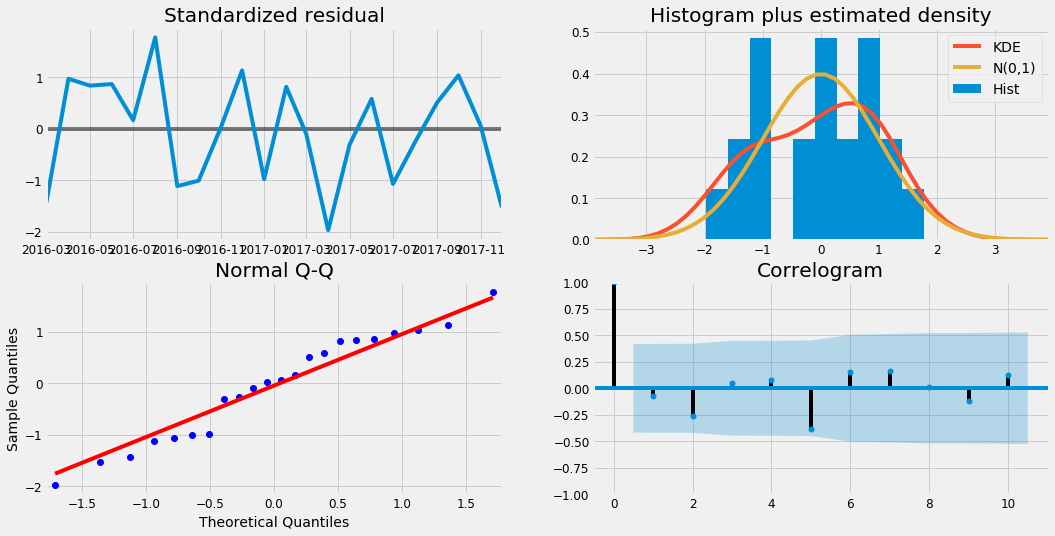

In [80]:
    results.plot_diagnostics(figsize=(16,8))
    plt.show()

In [ ]:
# It is not perfect. However , our model diagnostics suggest that the model residuals are normally distributed. 
# Validating Forecast

In [84]:
# check the accuracy:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]

mse = ((y_forecasted - y_truth) ** 2).mean()
print("The MSE of our forecast is {}".format(round(mse,2)))

The MSE of our forecast is 5911.26


In [85]:
print("The Root Mean Square Error is {}".format(round(np.sqrt(mse),2)))

The Root Mean Square Error is 76.88


In [ ]:
# In statistics, the MSE of an estimator 

In [ ]:
# Producing & Visualize the forecasting

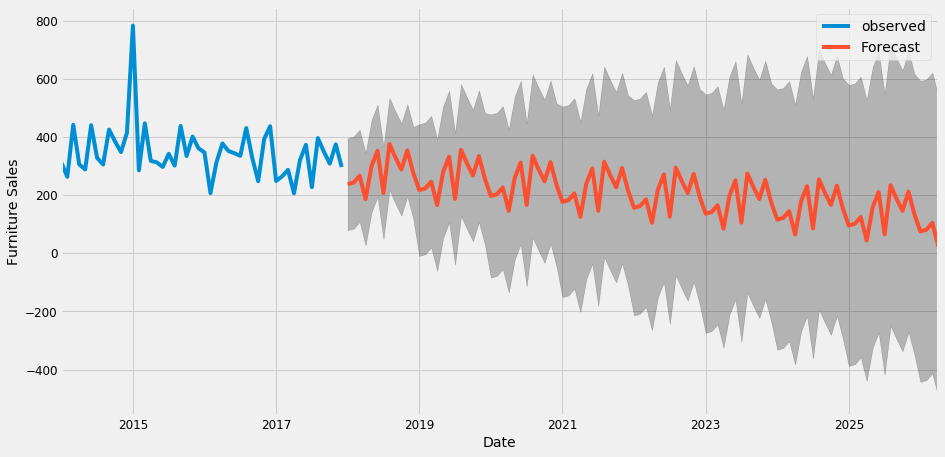

In [86]:
pred_fl = results.get_forecast(steps = 100)
pred_ci = pred_fl.conf_int()

ax = y.plot(label = 'observed', figsize=(14,7))
pred_fl.predicted_mean.plot(ax=ax, label = 'Forecast')
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:, 0],
               pred_ci.iloc[:, 1],
               color = 'k', alpha=.25)

ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()

plt.show()